In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants
from matplotlib.pyplot import figure

In [2]:
def ω_qnm(q,n,m,r1,r2,L):
    return constants.c/2/L*(q+(n+m+1)*np.arccos(np.sqrt((1-L/r1)*(1-L/r2)))/np.pi)

def fsr(L):
    return constants.c/2/L

def finesse(r1,r2):
    return np.pi*np.sqrt(r1*r1)/(1-r1*r2)

def g(R,L):
    return 1-L/R

def dx(g1,g2,L,theta1,theta2):
    return g2*L*theta1/(1-g1*g2)+L*theta2/(1-g1*g2)

def dtheta(g1,g2,theta1,theta2):
    return ((1-g2)*theta1 - (1-g1)*theta2)/(1-g1*g2)

def waist(λ,L,R):
    return np.sqrt(λ*L/2/np.pi*2*R/L/np.sqrt(2*R/L-1))

def waist0(λ,L,R):
    return np.sqrt(λ*L/2/np.pi*np.sqrt(2*R/L-1))

In [3]:
#piezo glue expansion

exp_coeff = 54e-6
dl = 1e-3*0.1*exp_coeff
print(dl)
r1 = 0.15
r2 = 0.15

l = 0.15
ω_qnm(276752,0,0,r1,r2,l) - ω_qnm(276752,0,0,r1,r2,l+dl)


5.4e-09


9956208.59375

In [4]:
finesse(0.9995,0.9995)

3140.807059028211

0.0
nearest line = -1498.96229
-2498.27048334375
fsr= 999.3081933333334 MHz
finesse = 1570.010535735991
linewidth= 636.4977626502849 kHz


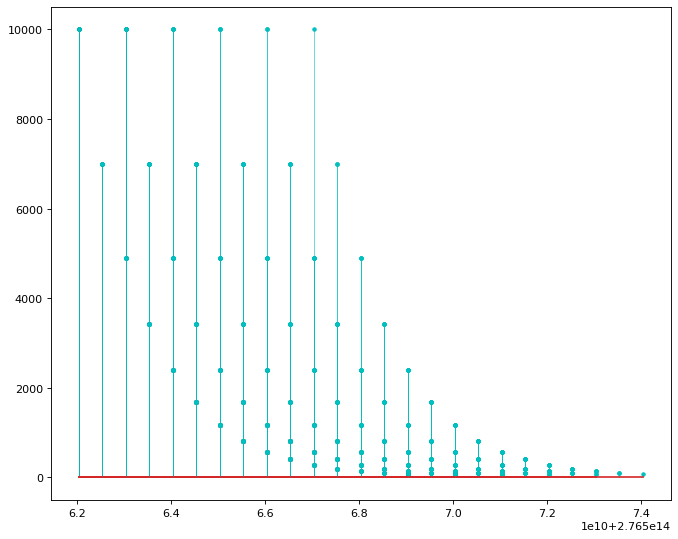

In [ ]:
r1 = 0.15
r2 = 0.15
l = 0.15
R1=0.9999
R2=0.999
figure(figsize=(10, 8), dpi=80)
g1 = g(r1,l)
g2 = g(r2,l)
print(g1*g2)
x = []
y=[]

lsize =0.5
for j in range(0,8):
    for k in range(0,8):
        x.append(int(ω_qnm(276753,j,k,r1,r2,l)))
        y.append(int(100*0.7**j*100*0.7**k))         
markers,stems,base = plt.stem(x,y,'r')
stems.set_linewidth(lsize)
markers.set_marker('.')

for j in range(0,8):
    for k in range(0,8):
        x.append(int(ω_qnm(276753+1,j,k,r1,r2,l)))
        y.append(int(100*0.7**j*100*0.7**k))
        
markers,stems,base = plt.stem(x,y,'b')
stems.set_linewidth(lsize)
markers.set_marker('.')

for j in range(0,8):
    for k in range(0,8):
        x.append(int(ω_qnm(276753+2,j,k,r1,r2,l)))
        y.append(int(100*0.7**j*100*0.7**k))
markers,stems,base = plt.stem(x,y,'g')
stems.set_linewidth(lsize)
markers.set_marker('.')

for j in range(0,8):
    for k in range(0,8):
        x.append(int(ω_qnm(276753+3,j,k,r1,r2,l)))
        y.append(int(100*0.7**j*100*0.7**k))
        
markers,stems,base = plt.stem(x,y,'c')
stems.set_linewidth(lsize)
markers.set_marker('.')

for j in range(0,8):
    for k in range(0,8):
        x.append(int(ω_qnm(276753+4,j,k,r1,r2,l)))
        y.append(int(100*0.7**j*100*0.7**k))
        
markers,stems,base = plt.stem(x,y,'c')
stems.set_linewidth(lsize)
markers.set_marker('.')

for j in range(0,8):
    for k in range(0,8):
        x.append(int(ω_qnm(276753+5,j,k,r1,r2,l)))
        y.append(int(100*0.7**j*100*0.7**k))
        
markers,stems,base = plt.stem(x,y,'c')
stems.set_linewidth(lsize)
markers.set_marker('.')

print('nearest line =',(ω_qnm(276754,0,0,r1,r2,l)-ω_qnm(276753,5,0,r1,r2,l))/1e6)
print((ω_qnm(276755,0,0,r1,r2,l)-ω_qnm(276753,9,0,r1,r2,l))/1e6)
print('fsr=',fsr(l)/1e6,'MHz')
print('finesse =', finesse(R1,R2))
print('linewidth=', fsr(l)/finesse(R1,R2)/1000,'kHz')
stems.set_linewidth(lsize)
plt.show()

In [5]:
dis = 10e-3
width = 4.6e-6
lin_re = fsr(l)/1e6*width/dis
print('the real linewidth is:',lin_re,'MHz')

the real linewidth is: 0.4596817689333334 MHz


In [6]:
waistcc = waist(np.array([1083e-9,852e-9]),l,1)
print('waist on concave mirror [seed] =',waistcc[0]/1e-6,'μm')
print('waist on concave mirror [Cs] =',waistcc[1]/1e-6,'μm')

waist on concave mirror [seed] = 313.306333772754 μm
waist on concave mirror [Cs] = 277.8911677109482 μm
